In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [3]:
sns.set(style='whitegrid')

In [8]:
#Uploading CSVs
from google.colab import files
uploaded = files.upload()

Saving circuits.csv to circuits.csv
Saving constructor_results.csv to constructor_results.csv
Saving constructor_standings.csv to constructor_standings.csv
Saving constructors.csv to constructors.csv
Saving driver_standings.csv to driver_standings.csv
Saving drivers.csv to drivers.csv
Saving lap_times.csv to lap_times.csv
Saving pit_stops.csv to pit_stops.csv
Saving qualifying.csv to qualifying.csv
Saving races.csv to races.csv
Saving results.csv to results.csv
Saving seasons.csv to seasons.csv
Saving sprint_results.csv to sprint_results.csv
Saving status.csv to status.csv


In [12]:
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
drivers = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")
status = pd.read_csv("status.csv")
qualifying = pd.read_csv("qualifying.csv")



In [23]:
#Filter races & results (2015-2024)
races_filtered = races[(races['year']>=2015)&(races['year']<=2024)]
results_filtered = results[results['raceId'].isin(races_filtered['raceId'])]


In [24]:
#Merge Tables
df = results_filtered.merge(races_filtered, on='raceId', how='left') \
                     .merge(drivers, on='driverId', how='left') \
                     .merge(constructors, on='constructorId', how='left') \
                     .merge(status, on='statusId', how='left')
df = df.merge(qualifying[['raceId','driverId','position']], on=['raceId','driverId'], how='left')
df.rename(columns={'position':'grid'}, inplace=True)

In [25]:
df

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,...,surname,dob,nationality_x,url_y,constructorRef,name_y,nationality_y,url,status,position_y
0,22538,926,1,131,44,1,1,1,1,25.0,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Finished,1.0
1,22539,926,3,131,6,2,2,2,2,18.0,...,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Finished,2.0
2,22540,926,20,6,5,4,3,3,3,15.0,...,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Finished,4.0
3,22541,926,13,3,19,3,4,4,4,12.0,...,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Finished,3.0
4,22542,926,831,15,12,10,5,5,5,10.0,...,Nasr,1992-08-21,Brazilian,http://en.wikipedia.org/wiki/Felipe_Nasr,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Finished,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,26760,1144,825,210,20,14,16,16,16,0.0,...,Magnussen,1992-10-05,Danish,http://en.wikipedia.org/wiki/Kevin_Magnussen,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,+1 Lap,15.0
4215,26761,1144,859,215,30,12,17,17,17,0.0,...,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,rb,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Engine,12.0
4216,26762,1144,822,15,77,9,\N,R,18,0.0,...,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Collision damage,9.0
4217,26763,1144,861,3,43,20,\N,R,19,0.0,...,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Engine,19.0


In [28]:
# Target Variable - DNF = 1 if not finished, 0 if finished
df['DNF'] = df['status'].apply(lambda x: 0 if x=='Finished' else 1)
df

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,...,dob,nationality_x,url_y,constructorRef,name_y,nationality_y,url,status,position_y,DNF
0,22538,926,1,131,44,1,1,1,1,25.0,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Finished,1.0,0
1,22539,926,3,131,6,2,2,2,2,18.0,...,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Finished,2.0,0
2,22540,926,20,6,5,4,3,3,3,15.0,...,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Finished,4.0,0
3,22541,926,13,3,19,3,4,4,4,12.0,...,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Finished,3.0,0
4,22542,926,831,15,12,10,5,5,5,10.0,...,1992-08-21,Brazilian,http://en.wikipedia.org/wiki/Felipe_Nasr,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Finished,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,26760,1144,825,210,20,14,16,16,16,0.0,...,1992-10-05,Danish,http://en.wikipedia.org/wiki/Kevin_Magnussen,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,+1 Lap,15.0,1
4215,26761,1144,859,215,30,12,17,17,17,0.0,...,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,rb,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Engine,12.0,1
4216,26762,1144,822,15,77,9,\N,R,18,0.0,...,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Collision damage,9.0,1
4217,26763,1144,861,3,43,20,\N,R,19,0.0,...,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Engine,19.0,1


In [29]:
# Driver experience (number of races before current race)
df['driver_experience'] = df.groupby('driverId').cumcount()

In [39]:
#Driver past DNF rate
driver_dnf_rate = df.groupby('driverId')['DNF'].expanding().mean().reset_index(level=0, drop=True)
df['driver_DNF_rate'] = driver_dnf_rate.fillna(0.5)

In [50]:
#For new drivers
rookie_dnf_rate = df[df['driver_experience']==0]['DNF'].mean()
df['driver_DNF_rate'] = df['driver_DNF_rate'].fillna(rookie_dnf_rate)

In [51]:
#Constructor reliability (1 - past DNF rate) - lower reliability: more likely to fail
constructor_dnf = df.groupby('constructorId')['DNF'].mean()
df['constructor_reliability'] = df['constructorId'].map(lambda x: 1 - constructor_dnf.get(x,0.8))


In [52]:
#Driver-constructor experience
df['driver_constructor_experience'] = df.groupby(['driverId','constructorId']).cumcount()

In [53]:
#Encode categorical features
driver_le = LabelEncoder()
df['driverId_encoded'] = driver_le.fit_transform(df['driverId'].astype(str))

le_constructor = LabelEncoder()
df['constructorId_encoded'] = le_constructor.fit_transform(df['constructorId'].astype(str))

le_circuit = LabelEncoder()
df['circuitId_encoded'] = le_circuit.fit_transform(df['circuitId'].astype(str))



In [54]:
#Features for ML
feature_cols = ['driver_experience','driver_DNF_rate','constructor_reliability','grid','laps',
                'driver_constructor_experience','driverId_encoded','constructorId_encoded','circuitId_encoded']
X = df[feature_cols]
y = df['DNF']

In [55]:
# Split training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
# Predict on validation set
y_pred = rf.predict(X_val)
y_pred_prob = rf.predict_proba(X_val)[:,1]

In [57]:
#Evaluate Model
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       441
           1       0.82      0.82      0.82       403

    accuracy                           0.83       844
   macro avg       0.83      0.83      0.83       844
weighted avg       0.83      0.83      0.83       844

ROC-AUC: 0.9110891668495356


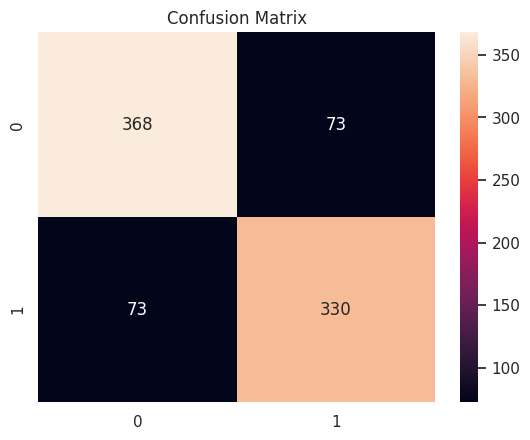

In [58]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

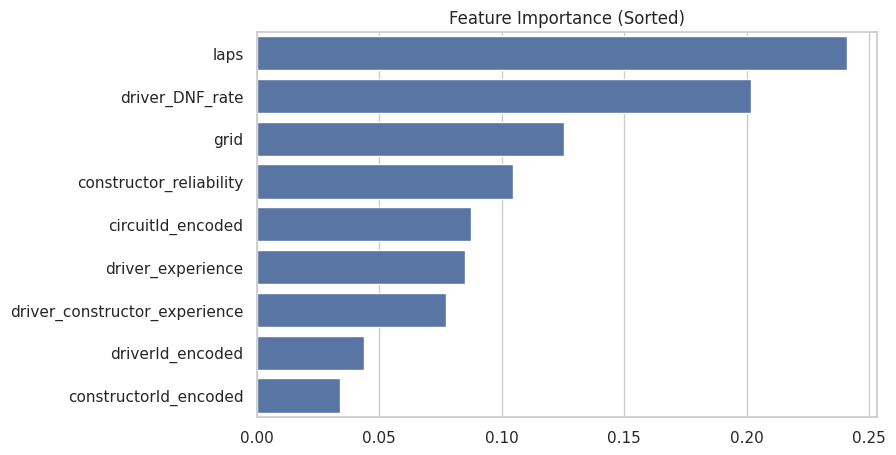

In [60]:
importances_sorted = sorted(zip(importances, feature_cols), reverse=True)
importance_vals, feature_names_sorted = zip(*importances_sorted)

plt.figure(figsize=(8,5))
sns.barplot(x=importance_vals, y=feature_names_sorted)
plt.title("Feature Importance (Sorted)")
plt.show()


In [115]:
uploaded = files.upload()

Saving f1_2025_last_race_results_n.csv to f1_2025_last_race_results_n.csv


In [117]:
circuits_n = pd.read_csv("circuits_n.csv", encoding='latin1')
constructor_standings_n = pd.read_csv("constructor_standings_n.csv", encoding='latin1')
constructors_n = pd.read_csv("constructors_n.csv", encoding='latin1')
driver_standings_n = pd.read_csv("driver_standings_n.csv", encoding='latin1')
drivers_n = pd.read_csv("drivers_n.csv", encoding='latin1')
f1_2025_results = pd.read_csv("f1_2025_last_race_results_n.csv", encoding='latin1')
qualifying_n = pd.read_csv("qualifying_n.csv", encoding='latin1')
races_n = pd.read_csv("races_n.csv", encoding='latin1')
results_n = pd.read_csv("results_n.csv", encoding='latin1')


In [123]:
print(races_n.columns)
print(results_n.columns)
print(drivers_n.columns)
print(qualifying_n.columns)
print(constructors_n.columns)
print(constructor_standings_n.columns)
print(circuits_n.columns)
print(driver_standings_n.columns)
print(f1_2025_results.columns)


Index(['race_id', 'season', 'round', 'race_name', 'date', 'time',
       'circuit_id'],
      dtype='object')
Index(['race_id', 'driver_id', 'constructor_id', 'grid', 'position',
       'position_order', 'points', 'laps', 'status'],
      dtype='object')
Index(['driver_id', 'givenName', 'familyName', 'nationality', 'dob'], dtype='object')
Index(['race_id', 'driver_id', 'constructor_id', 'position', 'q1', 'q2', 'q3'], dtype='object')
Index(['constructor_id', 'name', 'nationality', 'Wikipedia_url'], dtype='object')
Index(['season', 'round', 'constructor_id', 'position', 'points', 'wins'], dtype='object')
Index(['circuit_id', 'name', 'lat', 'long', 'locality', 'country',
       'Wikipedia_url '],
      dtype='object')
Index(['season', 'round', 'driver_id', 'position', 'points', 'wins'], dtype='object')
Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'Driver.driverId', 'Driver.permanentNumber', 'Driver.code',
       'Driver.url', 'Driver.givenName', 

In [124]:
results_2025 = results_n[results_n['race_id'].isin(races_2025['race_id'])]
df_2025 = results_2025.copy()


In [125]:
# Races info
races_2025_small = races_2025[['race_id','season','round','circuit_id']]

# Drivers info
drivers_small = drivers_n[['driver_id','givenName','familyName']].rename(
    columns={'givenName':'driver_forename','familyName':'driver_surname'}
)

# Constructors info
constructors_small = constructors_n[['constructor_id','name']].rename(
    columns={'name':'constructor_name'}
)

# Qualifying info (grid positions)
qualifying_small = qualifying_n[['race_id','driver_id','position']].rename(
    columns={'position':'grid'}
)


In [126]:
df_2025 = df_2025.merge(races_2025_small, on='race_id', how='left') \
                 .merge(drivers_small, on='driver_id', how='left') \
                 .merge(constructors_small, on='constructor_id', how='left') \
                 .merge(qualifying_small, on=['race_id','driver_id'], how='left')


In [132]:
df_2025['grid'] = df_2025['grid_y']

print(df_2025.shape)
print(df_2025.head())


(100, 24)
  race_id       driver_id constructor_id  grid_x position  position_order  \
0  2025_1          norris        mclaren       1        1               1   
1  2025_1  max_verstappen       red_bull       3        2               2   
2  2025_1         russell       mercedes       4        3               3   
3  2025_1       antonelli       mercedes      16        4               4   
4  2025_1           albon       williams       6        5               5   

   points  laps    status  season  ...  constructor_name grid_y  \
0    25.0    57  Finished    2025  ...           McLaren      1   
1    18.0    57  Finished    2025  ...          Red Bull      3   
2    15.0    57  Finished    2025  ...          Mercedes      4   
3    12.0    57  Finished    2025  ...          Mercedes     16   
4    10.0    57  Finished    2025  ...          Williams      6   

  driver_experience driver_DNF_rate constructor_reliability  \
0                 0             0.5                     0.2  

In [92]:
# DNF target
df_2025['DNF'] = df_2025['status'].apply(lambda x: 0 if x=='Finished' else 1)


In [128]:
# Driver experience (races before 2025)
df_2025['driver_experience'] = df_2025['driver_id'].apply(
    lambda x: df[df['driverId']==x].shape[0] if x in df['driverId'].values else 0
)

# Driver past DNF rate
df_2025['driver_DNF_rate'] = df_2025['driver_id'].apply(
    lambda x: df[df['driverId']==x]['DNF'].mean() if x in df['driverId'].values else 0.5
)

# Constructor reliability
constructor_dnf = df.groupby('constructorId')['DNF'].mean()
df_2025['constructor_reliability'] = df_2025['constructor_id'].apply(
    lambda x: 1 - constructor_dnf.get(x, 0.8)
)

# Driver-constructor experience
df_2025['driver_constructor_experience'] = df_2025.apply(
    lambda row: df[(df['driverId']==row['driver_id']) & (df['constructorId']==row['constructor_id'])].shape[0],
    axis=1
)

In [136]:
driver_le = LabelEncoder()
df_2025['driverId_encoded'] = driver_le.fit_transform(df_2025['driver_id'].astype(str))

le_constructor = LabelEncoder()
df_2025['constructorId_encoded'] = le_constructor.fit_transform(df_2025['constructor_id'].astype(str))

le_circuit = LabelEncoder()
df_2025['circuitId_encoded'] = le_circuit.fit_transform(df_2025['circuit_id'].astype(str))

In [137]:
df_2025['laps'] = df_2025['laps'].fillna(0)

In [139]:
feature_cols = ['driver_experience','driver_DNF_rate','constructor_reliability',
                'grid','laps','driver_constructor_experience','driverId_encoded',
                'constructorId_encoded','circuitId_encoded']

X_2025 = df_2025[feature_cols]


In [147]:
df_2025['DNF_prob'] = rf.predict_proba(X_2025)[:,1]

# Top 10 drivers most likely to DNF
top_DNF = df_2025.sort_values('DNF_prob', ascending=False)[
    ['driver_forename','driver_surname','constructor_name','race_id','DNF_prob']
].head(10)

print(top_DNF)


   driver_forename driver_surname constructor_name race_id  DNF_prob
99          Pierre          Gasly   Alpine F1 Team  2025_5      0.85
98            Yuki        Tsunoda         Red Bull  2025_5      0.84
18            Jack         Doohan   Alpine F1 Team  2025_1      0.83
16        Fernando         Alonso     Aston Martin  2025_1      0.81
17          Carlos          Sainz         Williams  2025_1      0.81
19           Isack         Hadjar       RB F1 Team  2025_1      0.81
79            Nico    HÃ¼lkenberg           Sauber  2025_4      0.79
39          Pierre          Gasly   Alpine F1 Team  2025_2      0.79
36        Fernando         Alonso     Aston Martin  2025_2      0.78
37         Charles        Leclerc          Ferrari  2025_2      0.78


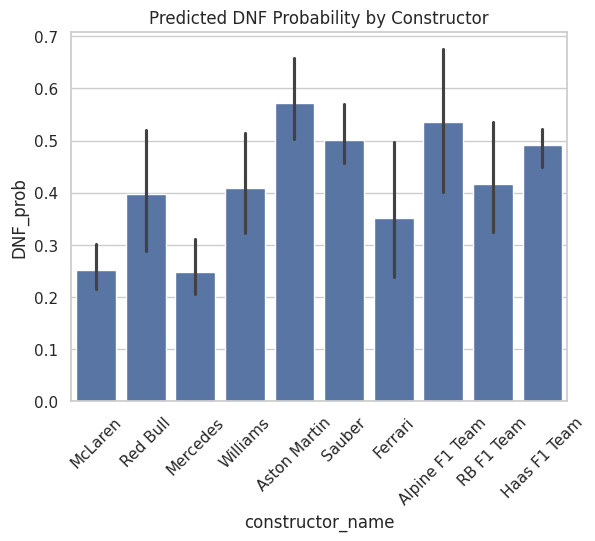

In [149]:
# DNF probability per constructor
sns.barplot(x='constructor_name', y='DNF_prob', data=df_2025)
plt.xticks(rotation=45)
plt.title("Predicted DNF Probability by Constructor")
plt.show()

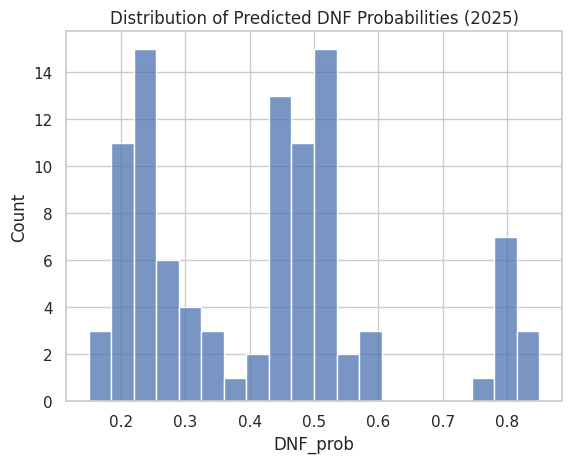

In [150]:
#Per driver
sns.histplot(df_2025['DNF_prob'], bins=20)
plt.title("Distribution of Predicted DNF Probabilities (2025)")
plt.show()


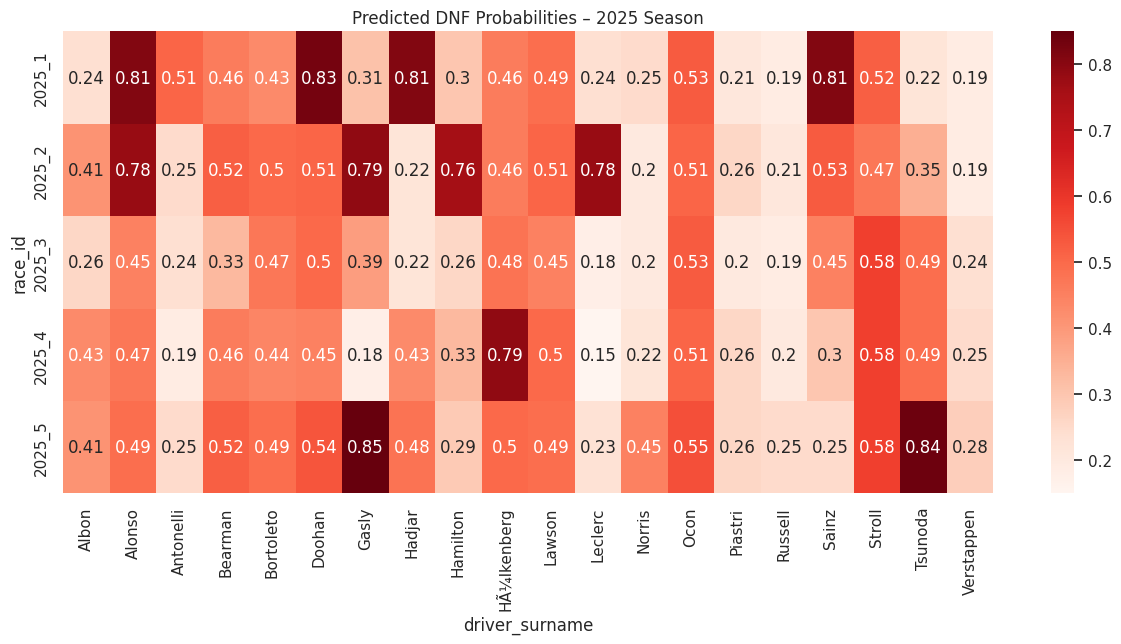

In [159]:
pivot = df_2025.pivot_table(index='race_id', columns='driver_surname', values='DNF_prob', fill_value=0)
plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap='Reds', annot=True)
plt.title("Predicted DNF Probabilities – 2025 Season")
plt.show()


/tmp/ipython-input-2693299606.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


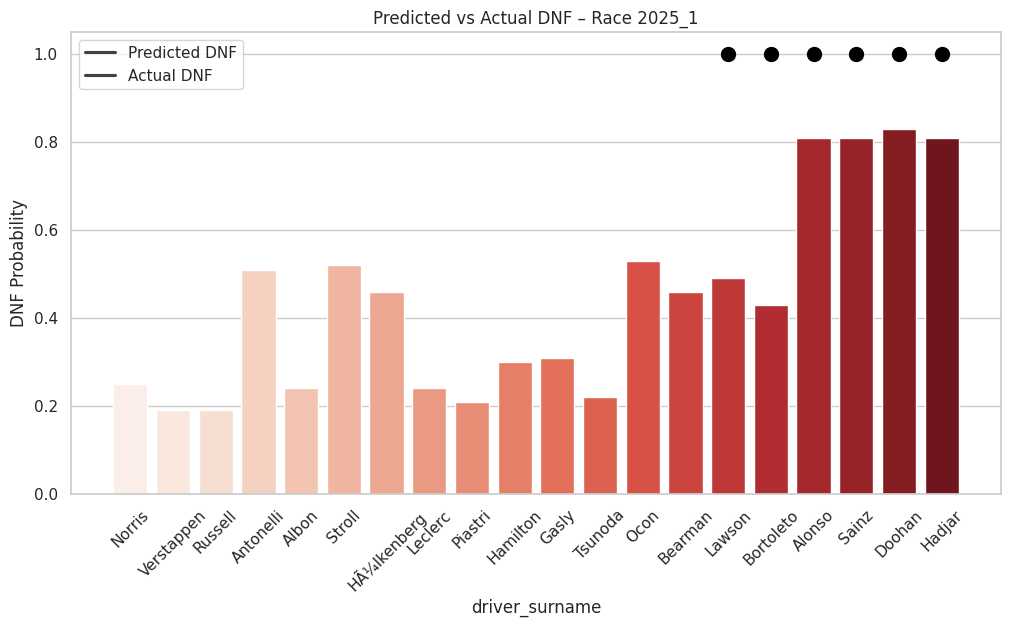

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_race_dnf(race_id):
    race_df = df_2025[df_2025['race_id'] == race_id].copy()

    # Add a column for actual DNF (1 = DNF, 0 = finished)
    race_df['actual_DNF'] = race_df['status'] != "Finished"

    plt.figure(figsize=(12,6))

    # Barplot: predicted DNF
    sns.barplot(
        x='driver_surname', y='DNF_prob', data=race_df, palette='Reds', label='Predicted DNF'
    )

    # Overlay actual DNF as black dots
    for idx, row in race_df.iterrows():
        if row['actual_DNF']:
            plt.scatter(row['driver_surname'], 1, color='black', s=100, label='Actual DNF')

    plt.title(f"Predicted vs Actual DNF – Race {race_id}")
    plt.ylabel("DNF Probability")
    plt.xticks(rotation=45)
    plt.ylim(0,1.05)
    plt.legend(['Predicted DNF','Actual DNF'])
    plt.show()
plot_race_dnf('2025_1')



=== Race: 2025_1 ===
   driver_forename driver_surname constructor_name  grid    status  DNF_prob
18            Jack         Doohan   Alpine F1 Team    14   Retired      0.83
16        Fernando         Alonso     Aston Martin    12   Retired      0.81
17          Carlos          Sainz         Williams    10   Retired      0.81
19           Isack         Hadjar       RB F1 Team    11   Retired      0.81
12         Esteban           Ocon     Haas F1 Team    19  Finished      0.53
5            Lance         Stroll     Aston Martin    13  Finished      0.52
3      Andrea Kimi      Antonelli         Mercedes    16  Finished      0.51
14            Liam         Lawson         Red Bull    18   Retired      0.49
13          Oliver        Bearman     Haas F1 Team    20  Finished      0.46
6             Nico    HÃ¼lkenberg           Sauber    17  Finished      0.46
15         Gabriel      Bortoleto           Sauber    15   Retired      0.43
10          Pierre          Gasly   Alpine F1 Team    

/tmp/ipython-input-1435256798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='driver_surname', y='DNF_prob', data=race_df, palette='Reds')


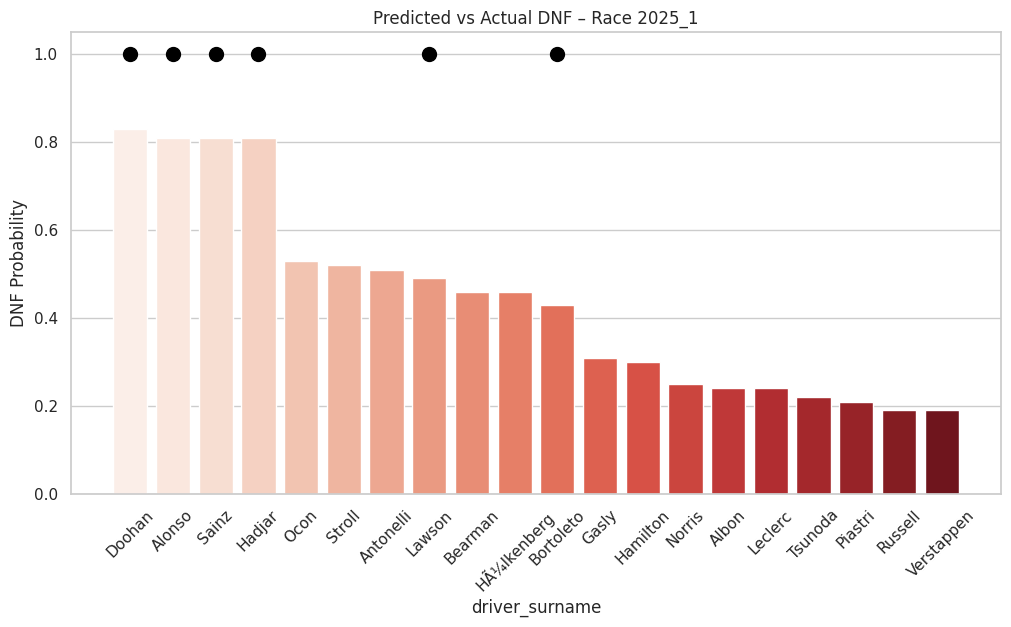


=== Race: 2025_2 ===
   driver_forename driver_surname constructor_name  grid        status  \
39          Pierre          Gasly   Alpine F1 Team    16  Disqualified   
36        Fernando         Alonso     Aston Martin    13       Retired   
37         Charles        Leclerc          Ferrari     6  Disqualified   
38           Lewis       Hamilton          Ferrari     5  Disqualified   
29          Carlos          Sainz         Williams    15      Finished   
27          Oliver        Bearman     Haas F1 Team    17      Finished   
31            Liam         Lawson         Red Bull    20      Finished   
24         Esteban           Ocon     Haas F1 Team    11      Finished   
32            Jack         Doohan   Alpine F1 Team    18      Finished   
33         Gabriel      Bortoleto           Sauber    19        Lapped   
28           Lance         Stroll     Aston Martin    14      Finished   
34            Nico    HÃ¼lkenberg           Sauber    12        Lapped   
26       Alexand

/tmp/ipython-input-1435256798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='driver_surname', y='DNF_prob', data=race_df, palette='Reds')


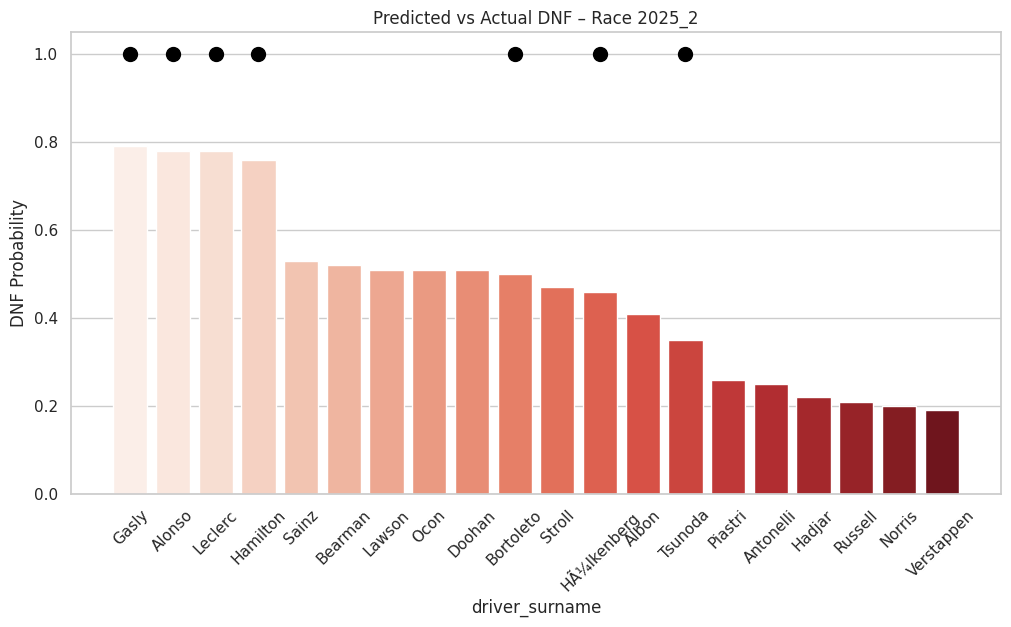


=== Race: 2025_3 ===
   driver_forename driver_surname constructor_name  grid    status  DNF_prob
59           Lance         Stroll     Aston Martin    20    Lapped      0.58
57         Esteban           Ocon     Haas F1 Team    18  Finished      0.53
54            Jack         Doohan   Alpine F1 Team    19  Finished      0.50
51            Yuki        Tsunoda         Red Bull    15  Finished      0.49
55            Nico    HÃ¼lkenberg           Sauber    16  Finished      0.48
58         Gabriel      Bortoleto           Sauber    17  Finished      0.47
53          Carlos          Sainz         Williams    12  Finished      0.45
50        Fernando         Alonso     Aston Martin    13  Finished      0.45
56            Liam         Lawson       RB F1 Team    14  Finished      0.45
52          Pierre          Gasly   Alpine F1 Team    11  Finished      0.39
49          Oliver        Bearman     Haas F1 Team    10  Finished      0.33
46           Lewis       Hamilton          Ferrari    

/tmp/ipython-input-1435256798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='driver_surname', y='DNF_prob', data=race_df, palette='Reds')


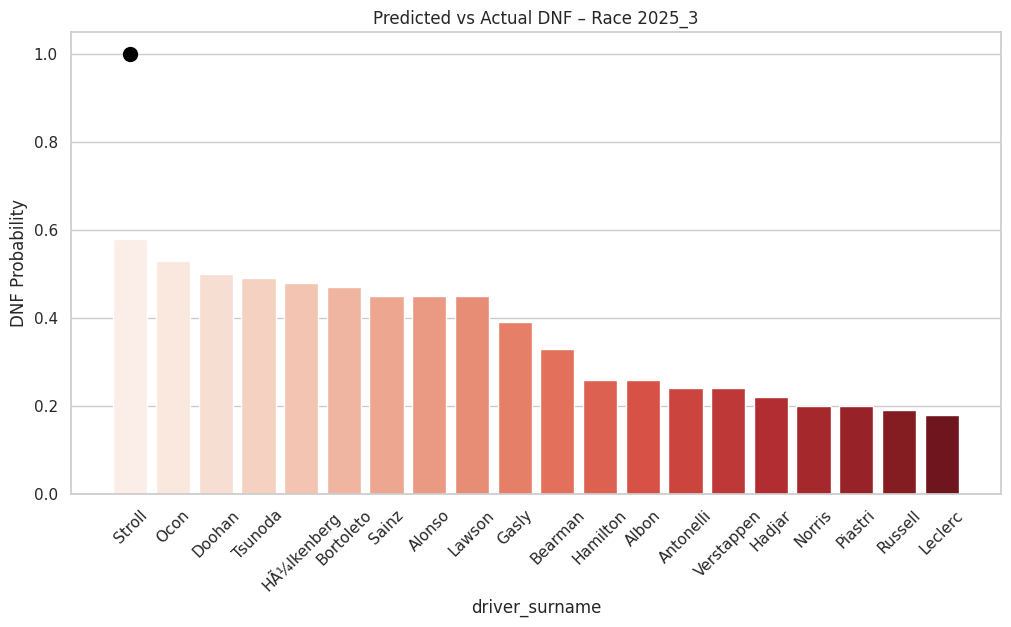


=== Race: 2025_4 ===
   driver_forename driver_surname constructor_name  grid        status  \
79            Nico    HÃ¼lkenberg           Sauber    16  Disqualified   
76           Lance         Stroll     Aston Martin    19      Finished   
67         Esteban           Ocon     Haas F1 Team    14      Finished   
75            Liam         Lawson       RB F1 Team    17      Finished   
68            Yuki        Tsunoda         Red Bull    10      Finished   
74        Fernando         Alonso     Aston Martin    13      Finished   
69          Oliver        Bearman     Haas F1 Team    20      Finished   
73            Jack         Doohan   Alpine F1 Team    11      Finished   
77         Gabriel      Bortoleto           Sauber    18      Finished   
71       Alexander          Albon         Williams    15      Finished   
72           Isack         Hadjar       RB F1 Team    12      Finished   
64           Lewis       Hamilton          Ferrari     9      Finished   
78          Carl

/tmp/ipython-input-1435256798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='driver_surname', y='DNF_prob', data=race_df, palette='Reds')


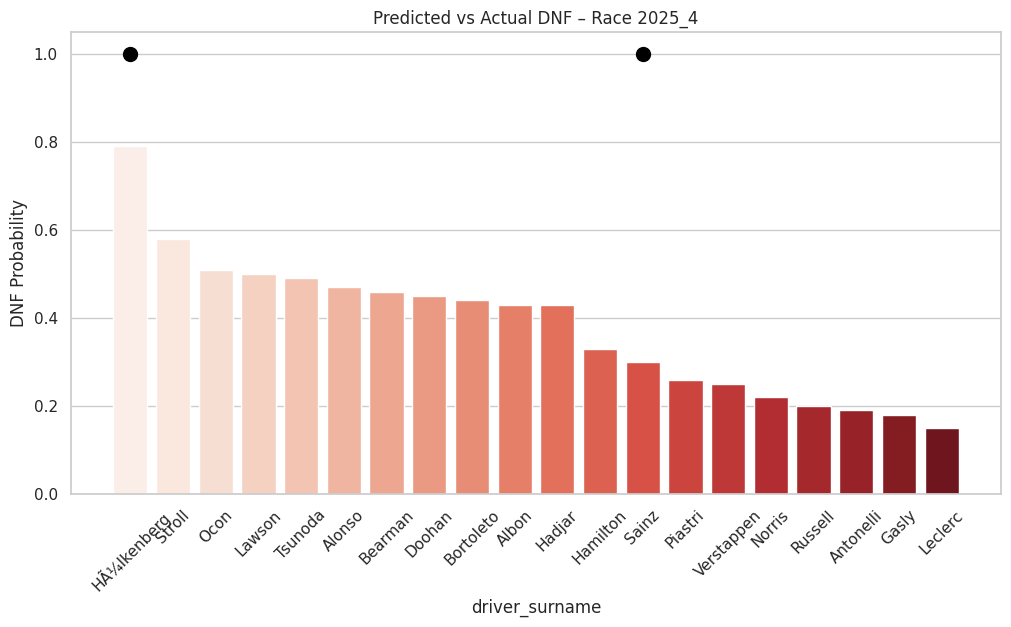


=== Race: 2025_5 ===
   driver_forename driver_surname constructor_name  grid    status  DNF_prob
99          Pierre          Gasly   Alpine F1 Team     9   Retired      0.85
98            Yuki        Tsunoda         Red Bull     8   Retired      0.84
95           Lance         Stroll     Aston Martin    16    Lapped      0.58
93         Esteban           Ocon     Haas F1 Team    19  Finished      0.55
96            Jack         Doohan   Alpine F1 Team    17    Lapped      0.54
92          Oliver        Bearman     Haas F1 Team    15  Finished      0.52
94            Nico    HÃ¼lkenberg           Sauber    18    Lapped      0.50
90        Fernando         Alonso     Aston Martin    13  Finished      0.49
91            Liam         Lawson       RB F1 Team    12  Finished      0.49
97         Gabriel      Bortoleto           Sauber    20    Lapped      0.49
89           Isack         Hadjar       RB F1 Team    14  Finished      0.48
83           Lando         Norris          McLaren    

/tmp/ipython-input-1435256798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='driver_surname', y='DNF_prob', data=race_df, palette='Reds')


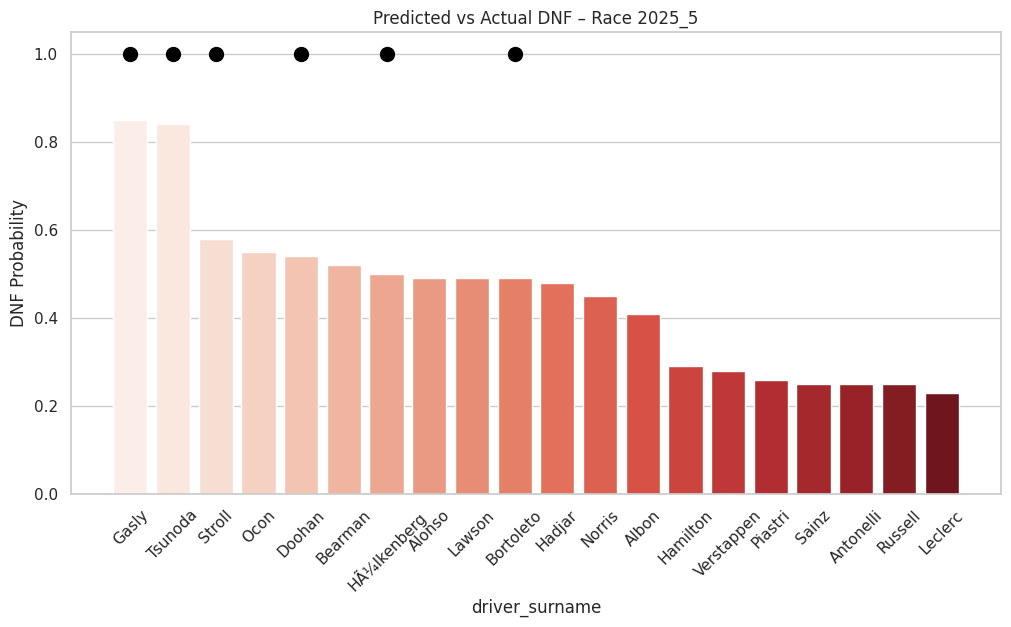

In [164]:
all_race_ids = df_2025['race_id'].unique()

for race_id in all_race_ids:
    race_df = df_2025[df_2025['race_id'] == race_id].copy()
    race_df['actual_DNF'] = race_df['status'] != "Finished"

    # Sort by predicted probability
    race_df = race_df.sort_values('DNF_prob', ascending=False)

    print(f"\n=== Race: {race_id} ===")
    print(race_df[['driver_forename','driver_surname','constructor_name','grid','status','DNF_prob']])

    # Optional: bar plot
    plt.figure(figsize=(12,6))
    sns.barplot(x='driver_surname', y='DNF_prob', data=race_df, palette='Reds')

    # Overlay actual DNF as black dots
    for idx, row in race_df.iterrows():
        if row['actual_DNF']:
            plt.scatter(row['driver_surname'], 1, color='black', s=100)

    plt.title(f"Predicted vs Actual DNF – Race {race_id}")
    plt.ylabel("DNF Probability")
    plt.xticks(rotation=45)
    plt.ylim(0,1.05)
    plt.show()
